In [57]:
import pandas as pd
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import tensorflow as tf
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score,precision_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.tokenize import wordpunct_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('./apple_data.csv', encoding = 'ISO-8859-1')
data

_unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0     623495513     True      golden                  10               NaN   
1     623495514     True      golden                  12               NaN   
2     623495515     True      golden                  10               NaN   
3     623495516     True      golden                  17               NaN   
4     623495517    False   finalized                   3    12/12/14 12:14   
...         ...      ...         ...                 ...               ...   
3881  623499442     True      golden                  13               NaN   
3882  623499450     True      golden                  16               NaN   
3883  623499486     True      golden                  14               NaN   
3884  623499514     True      golden                  13               NaN   
3885  623517290     True      golden                  17               NaN   

     sentiment  sentiment:confidence                            date  \
0            3                0.6264  Mon Dec 01 19:30:03 +0000 2014   
1            3                0.8129  Mon Dec 01 19:43:51 +0000 2014   
2            3                1.0000  Mon Dec 01 19:50:28 +0000 2014   
3            3                0.5848  Mon Dec 01 20:26:34 +0000 2014   
4            3                0.6474  Mon Dec 01 20:29:33 +0000 2014   
...        ...                   ...                             ...   
3881         3                0.7757  Tue Dec 09 22:08:53 +0000 2014   
3882         3                0.6225  Tue Dec 09 22:18:27 +0000 2014   
3883         5                0.9347  Tue Dec 09 23:45:59 +0000 2014   
3884         1                0.9230  Wed Dec 10 00:48:10 +0000 2014   
3885         5                0.8938  Tue Dec 09 09:01:25 +0000 2014   

                id            query      sentiment_gold  \
0     5.400000e+17  #AAPL OR @Apple     3\nnot_relevant   
1     5.400000e+17  #AAPL OR @Apple                3\n1   
2     5.400000e+17  #AAPL OR @Apple                   3   
3     5.400000e+17  #AAPL OR @Apple                3\n1   
4     5.400000e+17  #AAPL OR @Apple                 NaN   
...            ...              ...                 ...   
3881  5.420000e+17  #AAPL OR @Apple                5\n3   
3882  5.420000e+17  #AAPL OR @Apple                3\n1   
3883  5.420000e+17  #AAPL OR @Apple                   5   
3884  5.420000e+17  #AAPL OR @Apple                   1   
3885  5.420000e+17  #AAPL OR @Apple  5\n3\nnot_relevant   

                                                   text  
0     #AAPL:The 10 best Steve Jobs emails ever...htt...  
1     RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...  
2     My cat only chews @apple cords. Such an #Apple...  
3     I agree with @jimcramer that the #IndividualIn...  
4          Nobody expects the Spanish Inquisition #AAPL  
...                                                 ...  
3881  (Via FC) Apple Is Warming Up To Social Media -...  
3882  RT @MMLXIV: there is no avocado emoji may I as...  
3883  @marcbulandr I could not agree more. Between @...  
3884  My iPhone 5's photos are no longer downloading...  
3885  RT @SwiftKey: We're so excited to be named to ...  

[3886 rows x 12 columns]

In [3]:
data1 = data[['text', 'sentiment']]
data1

text sentiment
0     #AAPL:The 10 best Steve Jobs emails ever...htt...         3
1     RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...         3
2     My cat only chews @apple cords. Such an #Apple...         3
3     I agree with @jimcramer that the #IndividualIn...         3
4          Nobody expects the Spanish Inquisition #AAPL         3
...                                                 ...       ...
3881  (Via FC) Apple Is Warming Up To Social Media -...         3
3882  RT @MMLXIV: there is no avocado emoji may I as...         3
3883  @marcbulandr I could not agree more. Between @...         5
3884  My iPhone 5's photos are no longer downloading...         1
3885  RT @SwiftKey: We're so excited to be named to ...         5

[3886 rows x 2 columns]

In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _unit_id              3886 non-null   int64  
 1   _golden               3886 non-null   bool   
 2   _unit_state           3886 non-null   object 
 3   _trusted_judgments    3886 non-null   int64  
 4   _last_judgment_at     3783 non-null   object 
 5   sentiment             3886 non-null   object 
 6   sentiment:confidence  3886 non-null   float64
 7   date                  3886 non-null   object 
 8   id                    3886 non-null   float64
 9   query                 3886 non-null   object 
 10  sentiment_gold        103 non-null    object 
 11  text                  3886 non-null   object 
 12  length                3886 non-null   int64  
dtypes: bool(1), float64(2), int64(3), object(7)
memory usage: 368.2+ KB


In [4]:
data1["sentiment"].value_counts()

sentiment
3               2162
1               1219
5                423
not_relevant      82
Name: count, dtype: int64

In [5]:
data1 = data1.drop(data1[data1['sentiment'] == "not_relevant"].index)
data1['sentiment'].value_counts()

sentiment
3    2162
1    1219
5     423
Name: count, dtype: int64

In [6]:

data1['sentiment']= data1['sentiment'].replace(['5','1', '3'], [1,0,2])
data1= data1.dropna(ignore_index = True)
data1

text  sentiment
0     #AAPL:The 10 best Steve Jobs emails ever...htt...          2
1     RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...          2
2     My cat only chews @apple cords. Such an #Apple...          2
3     I agree with @jimcramer that the #IndividualIn...          2
4          Nobody expects the Spanish Inquisition #AAPL          2
...                                                 ...        ...
3799  (Via FC) Apple Is Warming Up To Social Media -...          2
3800  RT @MMLXIV: there is no avocado emoji may I as...          2
3801  @marcbulandr I could not agree more. Between @...          1
3802  My iPhone 5's photos are no longer downloading...          0
3803  RT @SwiftKey: We're so excited to be named to ...          1

[3804 rows x 2 columns]

In [7]:
data1['sentiment'].value_counts()

sentiment
2    2162
0    1219
1     423
Name: count, dtype: int64

In [8]:
data1['label'] = ' '

for i in range(len(data1.sentiment)):
    if data1.sentiment[i] == 2:
        data1["label"][i] = 'neutral'
    elif data1.sentiment[i] == 0:
        data1["label"][i] = 'negative'
    else:
        data1["label"][i] = 'positive'
data1

C:\Users\marya\AppData\Local\Temp\ipykernel_41652\1228146621.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["label"][i] = 'neutral'
C:\Users\marya\AppData\Local\Temp\ipykernel_41652\1228146621.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["label"][i] = 'neutral'
C:\Users\marya\AppData\Local\Temp\ipykernel_41652\1228146621.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["label"][i] = 'neutral'
C:\Users\m

text  sentiment     label
0     #AAPL:The 10 best Steve Jobs emails ever...htt...          2   neutral
1     RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...          2   neutral
2     My cat only chews @apple cords. Such an #Apple...          2   neutral
3     I agree with @jimcramer that the #IndividualIn...          2   neutral
4          Nobody expects the Spanish Inquisition #AAPL          2   neutral
...                                                 ...        ...       ...
3799  (Via FC) Apple Is Warming Up To Social Media -...          2   neutral
3800  RT @MMLXIV: there is no avocado emoji may I as...          2   neutral
3801  @marcbulandr I could not agree more. Between @...          1  positive
3802  My iPhone 5's photos are no longer downloading...          0  negative
3803  RT @SwiftKey: We're so excited to be named to ...          1  positive

[3804 rows x 3 columns]

C:\Users\marya\AppData\Local\Temp\ipykernel_41652\1098135441.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'label', data=data1, palette = 'Set2')


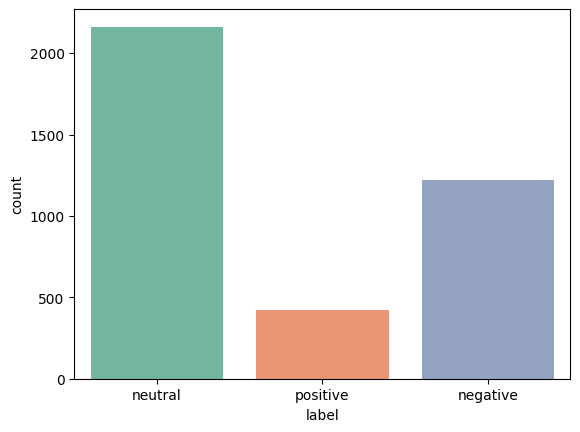

In [248]:
#displaying the number of sentiments
sns.countplot(x= 'label', data=data1, palette = 'Set2')
plt.show()

Text(0.5, 1.0, 'Sentiment percentage of tweets')

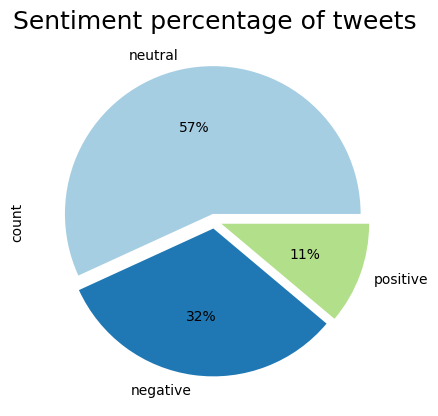

In [176]:
draw = data1['label'].value_counts()
colors = sns.color_palette('Paired')
ax = draw.plot(kind='pie',autopct='%1.0f%%', colors = colors, explode = (0.05, 0.05,0.05) )
ax.set_title('Sentiment percentage of tweets', fontsize = 18)

pre processing

In [11]:
data1 = data1.dropna(ignore_index = True)
datac = data1.copy()
datac['clean_text'] = ''
def remove_c():
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|#[a-zA-Z]+|$[a-zA-Z]+|@[a-zA-Z]+|[,.^_$*%-;鶯!?:]')
    for i in range(len(datac["text"])):
        datac["clean_text"][i] = pattern.sub('', datac["text"][i])
remove_c()
datac['clean_text'] = datac['clean_text'].str.lower()
datac

C:\Users\marya\AppData\Local\Temp\ipykernel_41652\1894017076.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datac["clean_text"][i] = pattern.sub('', datac["text"][i])
C:\Users\marya\AppData\Local\Temp\ipykernel_41652\1894017076.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datac["clean_text"][i] = pattern.sub('', datac["text"][i])
C:\Users\marya\AppData\Local\Temp\ipykernel_41652\1894017076.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

text  sentiment     label  \
0     #AAPL:The 10 best Steve Jobs emails ever...htt...          2   neutral   
1     RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...          2   neutral   
2     My cat only chews @apple cords. Such an #Apple...          2   neutral   
3     I agree with @jimcramer that the #IndividualIn...          2   neutral   
4          Nobody expects the Spanish Inquisition #AAPL          2   neutral   
...                                                 ...        ...       ...   
3799  (Via FC) Apple Is Warming Up To Social Media -...          2   neutral   
3800  RT @MMLXIV: there is no avocado emoji may I as...          2   neutral   
3801  @marcbulandr I could not agree more. Between @...          1  positive   
3802  My iPhone 5's photos are no longer downloading...          0  negative   
3803  RT @SwiftKey: We're so excited to be named to ...          1  positive   

                                             clean_text  
0                      the  best steve jobs emails ever  
1     rt  why aapl stock had a miniflash crash today...  
2                     my cat only chews  cords such an   
3     i agree with  that the  should own not trade  ...  
4               nobody expects the spanish inquisition   
...                                                 ...  
3799  via fc apple is warming up to social media  ap...  
3800       rt  there is no avocado emoji may i ask why   
3801   i could not agree more between   and  only gr...  
3802  my iphone s photos are no longer downloading a...  
3803  rt  were so excited to be named to s app store...  

[3804 rows x 4 columns]

In [12]:
#removing rows of neutral tweets
datac = datac.drop(datac[datac['sentiment'] == 2 ].index)
datac= datac.dropna(ignore_index = True)
datac

text  sentiment     label  \
0     Top 3 all @Apple #tablets. Damn right! http://...          1  positive   
1     CNBCTV: #Apple's margins better than expected?...          1  positive   
2     WTF MY BATTERY WAS 31% ONE SECOND AGO AND NOW ...          0  negative   
3     RT @peterpham: Bought my @AugustSmartLock at t...          1  positive   
4     @apple Contact sync between Yosemite and iOS8 ...          0  negative   
...                                                 ...        ...       ...   
1637  RT @shannonmmiller: Love the @Apple is support...          1  positive   
1638  hey @apple is it normal for my laptop charger ...          0  negative   
1639  @marcbulandr I could not agree more. Between @...          1  positive   
1640  My iPhone 5's photos are no longer downloading...          0  negative   
1641  RT @SwiftKey: We're so excited to be named to ...          1  positive   

                                             clean_text  
0                                top  all   damn right   
1               cnbctv s margins better than expected    
2     wtf my battery was  one second ago and now is ...  
3     rt  bought my  at the  storepretty good logo m...  
4      contact sync between yosemite and ios is seri...  
...                                                 ...  
1637      rt  love the  is supporting  with workshops    
1638  hey  is it normal for my laptop charger to be ...  
1639   i could not agree more between   and  only gr...  
1640  my iphone s photos are no longer downloading a...  
1641  rt  were so excited to be named to s app store...  

[1642 rows x 4 columns]

In [13]:
data2 = datac[['clean_text', 'sentiment','label']]
data2

clean_text  sentiment     label
0                                top  all   damn right           1  positive
1               cnbctv s margins better than expected            1  positive
2     wtf my battery was  one second ago and now is ...          0  negative
3     rt  bought my  at the  storepretty good logo m...          1  positive
4      contact sync between yosemite and ios is seri...          0  negative
...                                                 ...        ...       ...
1637      rt  love the  is supporting  with workshops            1  positive
1638  hey  is it normal for my laptop charger to be ...          0  negative
1639   i could not agree more between   and  only gr...          1  positive
1640  my iphone s photos are no longer downloading a...          0  negative
1641  rt  were so excited to be named to s app store...          1  positive

[1642 rows x 3 columns]

In [14]:
#creating stop word list
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an','and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
'being', 'below', 'between','both', 'why', 'will', 'with', 'won', 'by', 'can', 'd', 'did', 'do', 'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
'further', 'had', 'has', 'have', 'having', 'iphone','iPhone','he', 'her', 'here','hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma','me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
'only', 'or', 'other', 'our', 'ours','re','s', 'same', 'she', "shes", 'cnbctv','should', "shouldve",'so', 'some', 'such',
't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them','themselves', 'then', 'there', 'these', 'they', 'this', 'those',
'through', 'to','ourselves', 'out', 'own', 'hey', 'too','under', 'until', 'up', 'very', 'was','we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
'y', 'you', "youd","youll", "youre", "youve", 'your', 'rt', 'yours', 'yourself', 'yourselves']

STOPWORDS = set(stopwordlist)
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data2['nostop_word'] = data2['clean_text'].apply(lambda text: remove_stopwords(text))
data2

clean_text  sentiment     label  \
0                                top  all   damn right           1  positive   
1               cnbctv s margins better than expected            1  positive   
2     wtf my battery was  one second ago and now is ...          0  negative   
3     rt  bought my  at the  storepretty good logo m...          1  positive   
4      contact sync between yosemite and ios is seri...          0  negative   
...                                                 ...        ...       ...   
1637      rt  love the  is supporting  with workshops            1  positive   
1638  hey  is it normal for my laptop charger to be ...          0  negative   
1639   i could not agree more between   and  only gr...          1  positive   
1640  my iphone s photos are no longer downloading a...          0  negative   
1641  rt  were so excited to be named to s app store...          1  positive   

                                            nostop_word  
0                                        top damn right  
1                               margins better expected  
2                        wtf battery one second ago wtf  
3     bought storepretty good logo match cant wait i...  
4     contact sync yosemite ios seriously screwed us...  
...                                                 ...  
1637                          love supporting workshops  
1638      normal laptop charger soldering skin thanks j  
1639                could not agree great things happen  
1640  photos no longer downloading automatically lap...  
1641             excited named app store best list year  

[1642 rows x 4 columns]

Tokenization

In [15]:
tweet = data2['nostop_word'].apply(lambda x: x.split())
tweet

0                                      [top, damn, right]
1                             [margins, better, expected]
2                   [wtf, battery, one, second, ago, wtf]
3       [bought, storepretty, good, logo, match, cant,...
4       [contact, sync, yosemite, ios, seriously, scre...
                              ...                        
1637                        [love, supporting, workshops]
1638    [normal, laptop, charger, soldering, skin, tha...
1639           [could, not, agree, great, things, happen]
1640    [photos, no, longer, downloading, automaticall...
1641       [excited, named, app, store, best, list, year]
Name: nostop_word, Length: 1642, dtype: object

Stemming

In [16]:
pstem = PorterStemmer()
data2['Normalize_tweets'] = ''
stweet = tweet.apply(lambda x: [pstem.stem(i) for i in x])

for i in range(len(tweet)):
    stweet[i] = ' '.join(stweet[i])

data2['Normalize_tweets'] = stweet
data2

clean_text  sentiment     label  \
0                                top  all   damn right           1  positive   
1               cnbctv s margins better than expected            1  positive   
2     wtf my battery was  one second ago and now is ...          0  negative   
3     rt  bought my  at the  storepretty good logo m...          1  positive   
4      contact sync between yosemite and ios is seri...          0  negative   
...                                                 ...        ...       ...   
1637      rt  love the  is supporting  with workshops            1  positive   
1638  hey  is it normal for my laptop charger to be ...          0  negative   
1639   i could not agree more between   and  only gr...          1  positive   
1640  my iphone s photos are no longer downloading a...          0  negative   
1641  rt  were so excited to be named to s app store...          1  positive   

                                            nostop_word  \
0                                        top damn right   
1                               margins better expected   
2                        wtf battery one second ago wtf   
3     bought storepretty good logo match cant wait i...   
4     contact sync yosemite ios seriously screwed us...   
...                                                 ...   
1637                          love supporting workshops   
1638      normal laptop charger soldering skin thanks j   
1639                could not agree great things happen   
1640  photos no longer downloading automatically lap...   
1641             excited named app store best list year   

                                       Normalize_tweets  
0                                        top damn right  
1                                  margin better expect  
2                        wtf batteri one second ago wtf  
3     bought storepretti good logo match cant wait i...  
4     contact sync yosemit io serious screw use much...  
...                                                 ...  
1637                              love support workshop  
1638          normal laptop charger solder skin thank j  
1639                  could not agre great thing happen  
1640  photo no longer download automat laptop sync s...  
1641                excit name app store best list year  

[1642 rows x 5 columns]

Creating Word Cloud

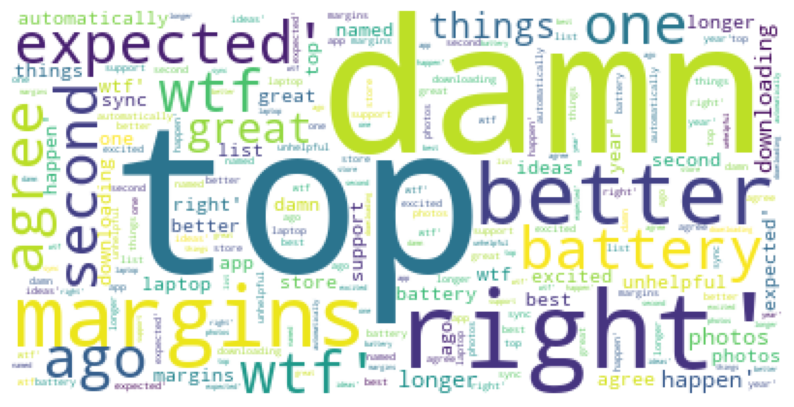

In [214]:
def word_cloud(tweet):
    stopword = set(STOPWORDS)
    w_cloud = WordCloud(background_color='white', max_words=1500,stopwords = stopword,repeat=True).generate(str(tweet))
    plt.figure(figsize=(10,8))
    plt.imshow(w_cloud)
    plt.axis("off")
    plt.show()
word_cloud(data2['nostop_word'].values)

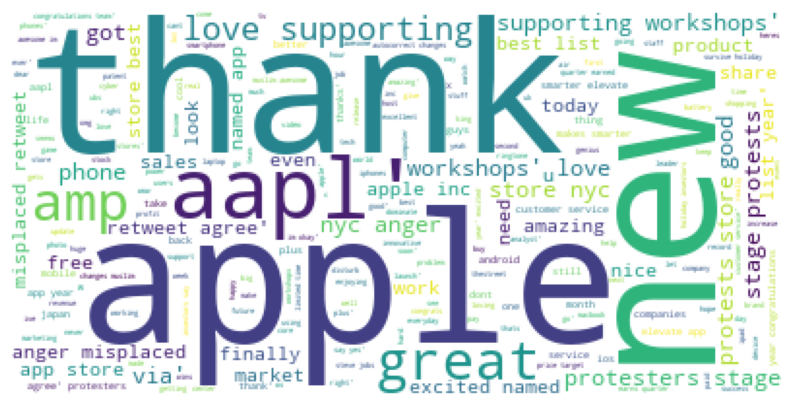

In [207]:
#Creating Wordcloud for all negative tweets
word_cloud(data2[data2["label"]=="positive"]["nostop_word"].values)

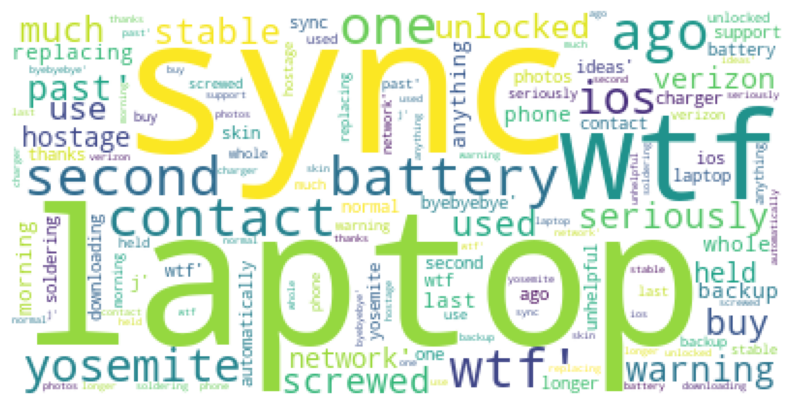

In [217]:
#Creating Wordcloud for all negative tweets
word_cloud(data2[data2["label"]=="negative"]["nostop_word"].values)

In [51]:
X = data2['Normalize_tweets']
y = data2['sentiment']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state =10)

In [54]:
vectorizer = TfidfVectorizer(min_df=3,sublinear_tf=True,encoding="latin-1", ngram_range=(1,2))

In [55]:
X_train_V= vectorizer.fit_transform(X_train.reset_index()["Normalize_tweets"]).toarray()
X_test_V = vectorizer.transform(X_test.reset_index()["Normalize_tweets"]).toarray()

In [249]:
def evaluate(estimator, X_train, X_test, y_train, y_test, y_pred):
    train_pred = estimator.predict(X_train)
    test_pred = estimator.predict(X_test)
    # print scores
    print("Train Values:")
    print(f"Recall: {recall_score(y_train, train_pred).round(2)}")
    print(f"Precision: {precision_score(y_train, train_pred).round(2)}")
    print(f"Accuracy: {accuracy_score(y_train, train_pred).round(2)}")
    print(f"F1 Score: {f1_score(y_train, train_pred).round(2)}")
    print("______________________")
    print("Test Values:")
    print(f"Recall: {recall_score(y_test, test_pred).round(2)}")
    print(f"Precision: {precision_score(y_test, test_pred).round(2)}")
    print(f"Accuracy: {accuracy_score(y_test, test_pred).round(2)}")
    print(f"F1 Score: {f1_score(y_test, test_pred).round(2)}")
    print("______________________")
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, np.round(y_pred))
    plt.show()


C:\Users\marya\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Train Values:
Recall: 0.91
Precision: 0.98
Accuracy: 0.97
F1 Score: 0.95
______________________
Test Values:
Recall: 0.67
Precision: 0.76
Accuracy: 0.86
F1 Score: 0.71
______________________
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       123
           1       0.76      0.67      0.71        42

    accuracy                           0.86       165
   macro avg       0.82      0.80      0.81       165
weighted avg       0.86      0.86      0.86       165



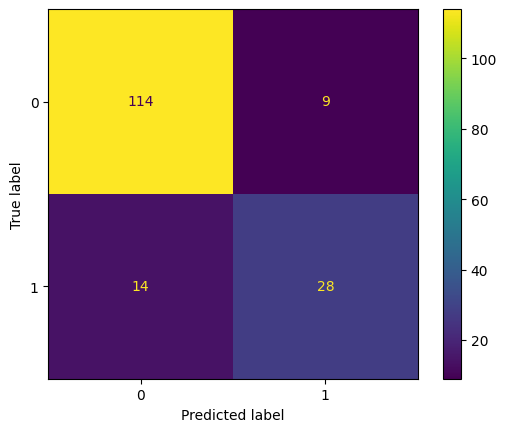

In [250]:
svc = LinearSVC()
svc.fit(X_train_V, y_train)
y_pred_svc = svc.predict(X_test_V)
evaluate(svc, X_train_V, X_test_V, y_train, y_test,y_pred_svc)


Train Values:
Recall: 0.61
Precision: 0.9
Accuracy: 0.88
F1 Score: 0.73
______________________
Test Values:
Recall: 0.4
Precision: 0.85
Accuracy: 0.83
F1 Score: 0.55
______________________
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       123
           1       0.85      0.40      0.55        42

    accuracy                           0.83       165
   macro avg       0.84      0.69      0.72       165
weighted avg       0.83      0.83      0.81       165



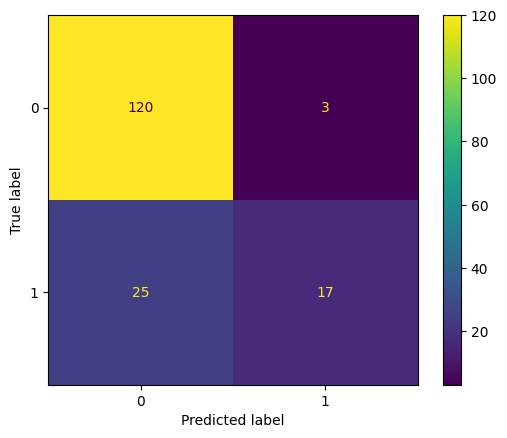

In [251]:
nb = MultinomialNB()
nb.fit(X_train_V, y_train)
y_pred_nb= nb.predict(X_test_V)
evaluate(nb, X_train_V, X_test_V, y_train, y_test,y_pred_nb)

Train Values:
Recall: 0.53
Precision: 0.98
Accuracy: 0.87
F1 Score: 0.68
______________________
Test Values:
Recall: 0.36
Precision: 0.94
Accuracy: 0.83
F1 Score: 0.52
______________________
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       123
           1       0.94      0.36      0.52        42

    accuracy                           0.83       165
   macro avg       0.88      0.67      0.71       165
weighted avg       0.85      0.83      0.80       165



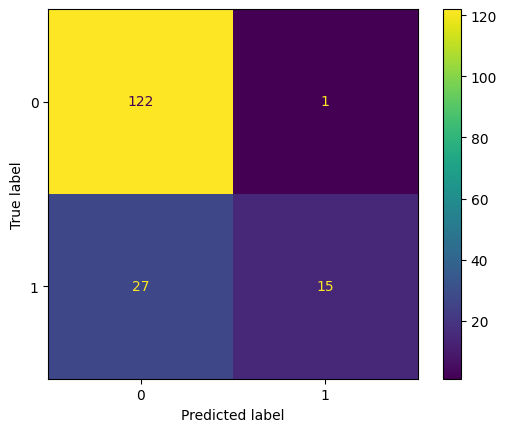

In [314]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train_V, y_train)
y_pred_lr = lr.predict(X_test_V)
evaluate(lr, X_train_V, X_test_V, y_train, y_test,y_pred_lr)


In [103]:
# create new df contains the sentiment and its encoded value, and create two dictionaries
sentiment_id_df = data2[['label', 'sentiment']].drop_duplicates().sort_values('label')
sentiment_to_id = dict(sentiment_id_df.values)
print("sentiment_to_id: ",sentiment_to_id)
id_to_sentiment = dict(sentiment_id_df[[ 'sentiment', 'label']].values)
print("id_to_sentiment: ",id_to_sentiment)

sentiment_to_id:  {'negative': 0, 'positive': 1}
id_to_sentiment:  {0: 'negative', 1: 'positive'}


In [309]:
test = datac['text']
test1 = pd.concat([data2, test], axis=1)
test1

clean_text  sentiment     label  \
0                                top  all   damn right           1  positive   
1               cnbctv s margins better than expected            1  positive   
2     wtf my battery was  one second ago and now is ...          0  negative   
3     rt  bought my  at the  storepretty good logo m...          1  positive   
4      contact sync between yosemite and ios is seri...          0  negative   
...                                                 ...        ...       ...   
1637      rt  love the  is supporting  with workshops            1  positive   
1638  hey  is it normal for my laptop charger to be ...          0  negative   
1639   i could not agree more between   and  only gr...          1  positive   
1640  my iphone s photos are no longer downloading a...          0  negative   
1641  rt  were so excited to be named to s app store...          1  positive   

                                            nostop_word  \
0                                        top damn right   
1                               margins better expected   
2                        wtf battery one second ago wtf   
3     bought storepretty good logo match cant wait i...   
4     contact sync yosemite ios seriously screwed us...   
...                                                 ...   
1637                          love supporting workshops   
1638      normal laptop charger soldering skin thanks j   
1639                could not agree great things happen   
1640  photos no longer downloading automatically lap...   
1641             excited named app store best list year   

                                       Normalize_tweets  \
0                                        top damn right   
1                                  margin better expect   
2                        wtf batteri one second ago wtf   
3     bought storepretti good logo match cant wait i...   
4     contact sync yosemit io serious screw use much...   
...                                                 ...   
1637                              love support workshop   
1638          normal laptop charger solder skin thank j   
1639                  could not agre great thing happen   
1640  photo no longer download automat laptop sync s...   
1641                excit name app store best list year   

                                                   text  
0     Top 3 all @Apple #tablets. Damn right! http://...  
1     CNBCTV: #Apple's margins better than expected?...  
2     WTF MY BATTERY WAS 31% ONE SECOND AGO AND NOW ...  
3     RT @peterpham: Bought my @AugustSmartLock at t...  
4     @apple Contact sync between Yosemite and iOS8 ...  
...                                                 ...  
1637  RT @shannonmmiller: Love the @Apple is support...  
1638  hey @apple is it normal for my laptop charger ...  
1639  @marcbulandr I could not agree more. Between @...  
1640  My iPhone 5's photos are no longer downloading...  
1641  RT @SwiftKey: We're so excited to be named to ...  

[1642 rows x 6 columns]

In [313]:
#testing the predictions 
tweet = data2['Normalize_tweets'][592]
tweet_original = test1['text'][592]
clean=vectorizer.transform([tweet]) 
prediction=svc.predict(clean)
prediction=id_to_sentiment[prediction[0]]
print('The Original tweet is:  ', tweet_original)
print('The normalized tweet is: ', tweet)
print('The predicted sentiment is: ',prediction)

The Original tweet is:   Free s/o @apple for this nice iPad
The normalized tweet is:  free nice ipad
The predicted sentiment is:  positive


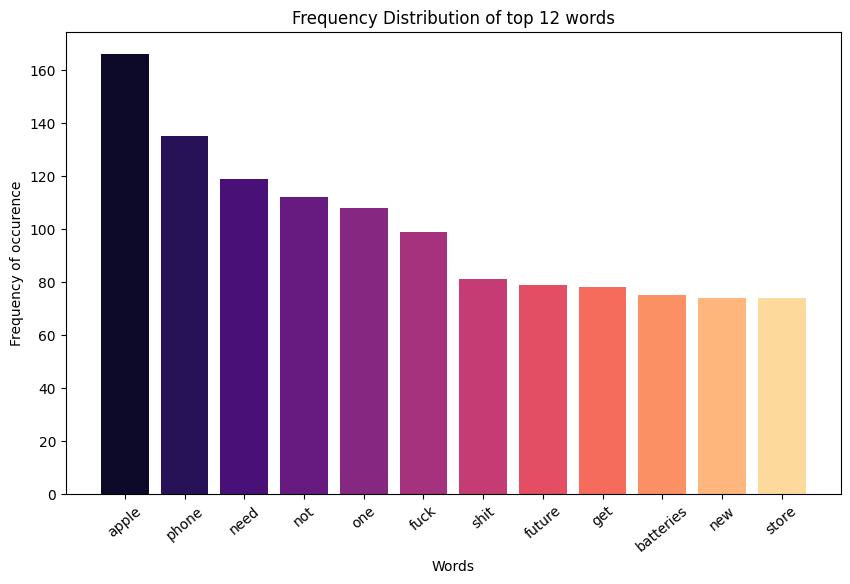

In [238]:
from collections import Counter

total_tweets = ' '.join(data2['nostop_word'])
#splitting the tweets in the form string into words
words = total_tweets.split()
words = [word for word in words]
word_counts = Counter(words)
top_words = word_counts.most_common(12)
word_list, frequency_list = zip(*top_words)
colors = sns.color_palette('magma', 12)
plt.figure(figsize=(10, 6)) 
plt.bar(word_list, frequency_list, color = colors)
plt.xlabel('Words')
plt.ylabel('Frequency of occurence')
plt.title('Frequency Distribution of top 12 words')
plt.xticks(rotation=40)
plt.show()